In [2]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.9 MB/s eta 0:00:00


In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="yL6Fc3RD17DKovOEy2Kclw",
    client_secret="Vf-mSbXhnh3HgVg-me_c5q0Ze-rO4Q",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("BITCOIN").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
93
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


In [4]:
headlines = set()
for submission in reddit.subreddit("BITCOIN").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

646


In [5]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Tomorrow’s gonna be a good day
1,"1 Bitcoin = 1 Bitcoin ? Yes, but..."
2,How much could Bitcoin slow down the economy i...
3,Advanced Bitcoin Reading List Curriculum in Order
4,Just made it to .05 btc. I know it's not a lot...


In [6]:
# df = df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Tomorrow’s gonna be a good day
1,"1 Bitcoin = 1 Bitcoin ? Yes, but..."
2,How much could Bitcoin slow down the economy i...
3,Advanced Bitcoin Reading List Curriculum in Order
4,Just made it to .05 btc. I know it's not a lot...


In [7]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
bitcoin_df.columns = ['Titles']

In [9]:
bitcoin_df.head()

,Titles
0,Tomorrow’s gonna be a good day
1,"1 Bitcoin = 1 Bitcoin ? Yes, but..."
2,How much could Bitcoin slow down the economy i...
3,Advanced Bitcoin Reading List Curriculum in Order
4,Just made it to .05 btc. I know it's not a lot...


In [10]:
bitcoin_df.Titles.duplicated().sum()

0

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Tomorrow’s gonna be a good day
1,"1 Bitcoin = 1 Bitcoin ? Yes, but..."
2,How much could Bitcoin slow down the economy i...
3,Advanced Bitcoin Reading List Curriculum in Order
4,Just made it to .05 btc. I know it's not a lot...


In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Tomorrow’s gonna be a good day
1,"1 Bitcoin = 1 Bitcoin ? Yes, but..."
2,How much could Bitcoin slow down the economy i...
3,Advanced Bitcoin Reading List Curriculum in Order
4,Just made it to .05 btc. I know it's not a lot...


In [13]:
!pip install textblob

In [14]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Tomorrow’s gonna be a good day,0.600000,0.700000
1,"1 Bitcoin = 1 Bitcoin ? Yes, but...",0.000000,0.000000
2,How much could Bitcoin slow down the economy i...,0.315972,-0.095139
3,Advanced Bitcoin Reading List Curriculum in Order,0.600000,0.400000
4,Just made it to .05 btc. I know it's not a lot...,0.568750,0.221875


In [16]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Tomorrow’s gonna be a good day,0.600000,0.700000,Positive
1,"1 Bitcoin = 1 Bitcoin ? Yes, but...",0.000000,0.000000,Neutral
2,How much could Bitcoin slow down the economy i...,0.315972,-0.095139,Negative
3,Advanced Bitcoin Reading List Curriculum in Order,0.600000,0.400000,Positive
4,Just made it to .05 btc. I know it's not a lot...,0.568750,0.221875,Positive
5,Forgot Bluewallet password,0.000000,0.000000,Neutral
6,Problem with mycelium,0.000000,0.000000,Neutral
7,Another buying opportunity…,0.000000,0.000000,Neutral
8,Verifying subsidy in blocks 839999 and 840000,0.000000,0.000000,Neutral
9,Can't believe the halving is here,0.000000,0.000000,Neutral


In [17]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

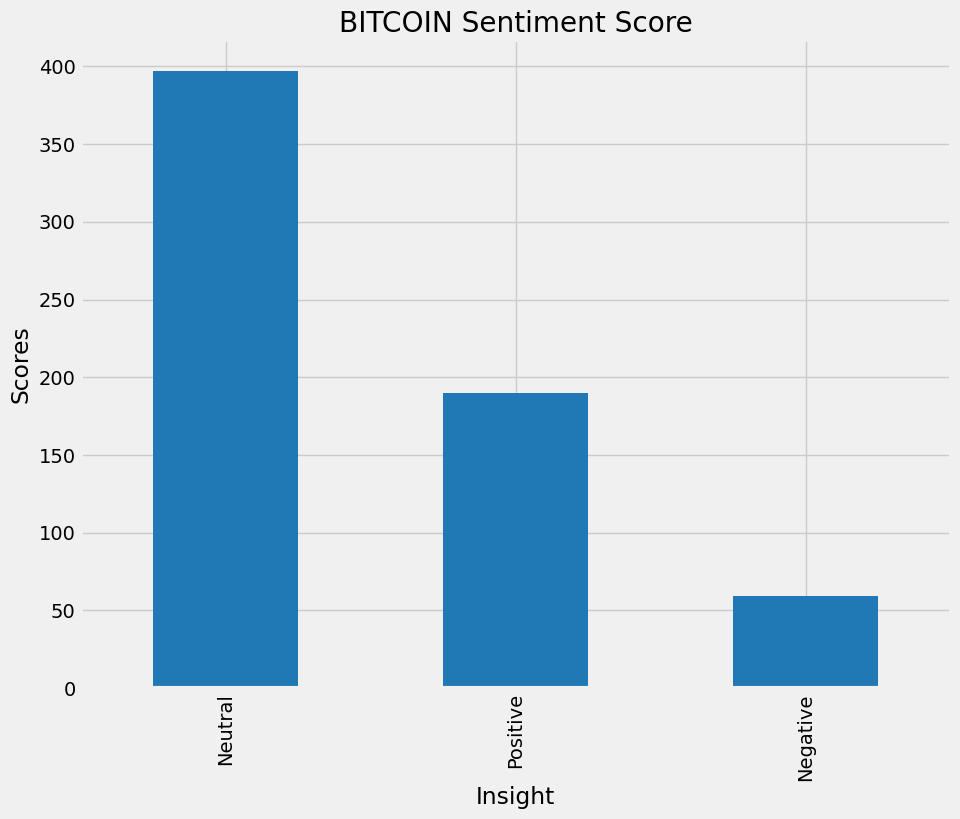

In [20]:
#Plot the values count of sentiment
plt.title("BITCOIN Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

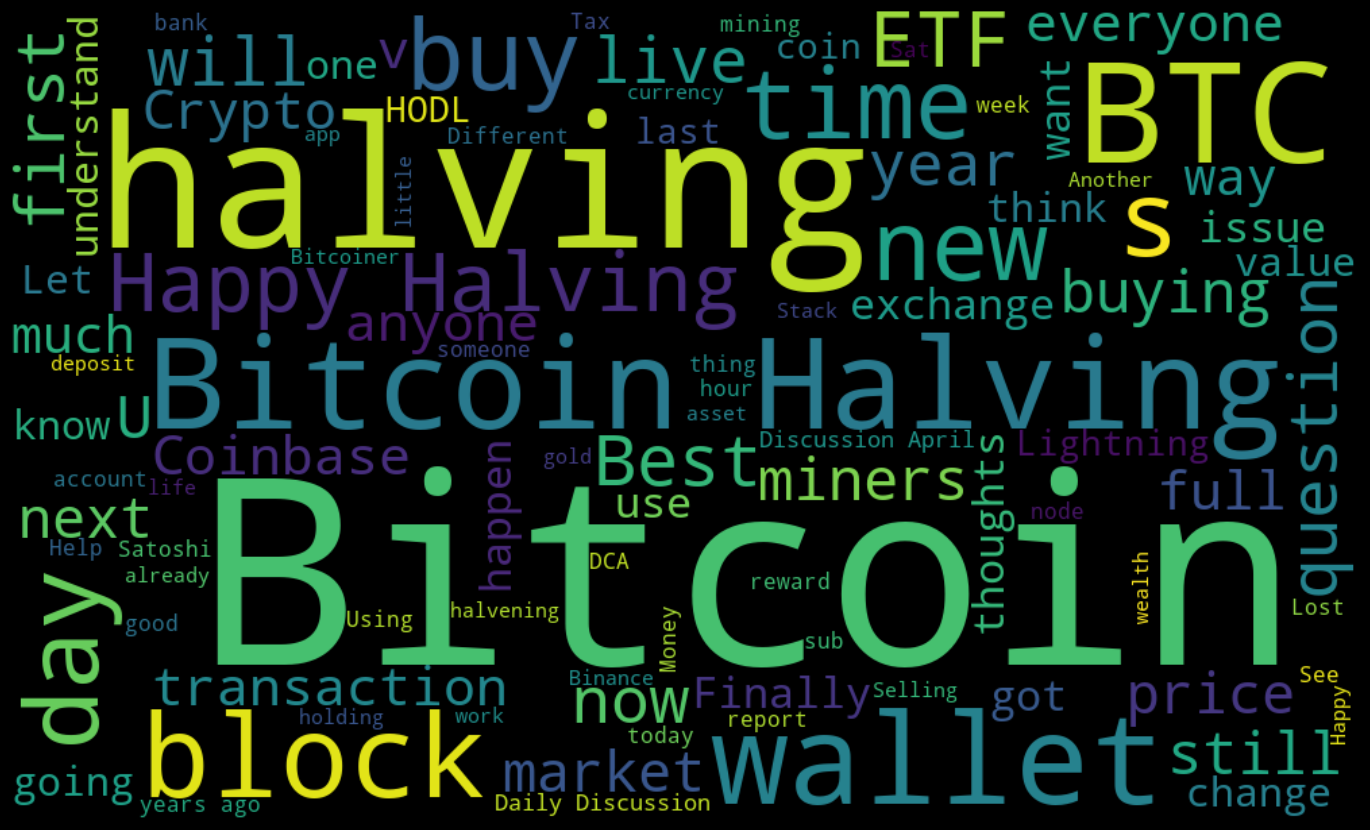

In [19]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");